# EDA Notebook 

## DATA SET : Weather Data 

### Source : https://app.swaggerhub.com/apis-docs/WeatherAPI.com/WeatherAPI/1.0.2#/APIs/history-weather

In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
from sklearn import tree
from sklearn import cluster
import requests as r
import json




In [2]:
months = ['Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep']

In [5]:

def get_weather_data(monthlist):
    # datalist = []
    x = 0
    for month in monthlist:
        response = r.get(url=f"https://api.weatherapi.com/v1/history.json?q=Perth&dt=2024-{month}-01&end_dt=2024-{month}-31&hour=8&key=96792ecea70641218aa32831252402")
        data_dict = json.loads(response.content)
        data = pd.json_normalize(data_dict['forecast']['forecastday'])
        if x == 0:
            baseset = data
        else:
            baseset = pd.concat([baseset, data], ignore_index=True)
        x += 1
        
    return baseset
        

    
    
        

In [ ]:
x = 0
for month in monthlist:
    response = r.get(url=f"https://api.weatherapi.com/v1/history.json?q=Perth&dt=2024-{month}-01&end_dt=2024-{month}-31&hour=8&key=96792ecea70641218aa32831252402")
    data_dict = json.loads(response.content)
    data = pd.json_normalize(data_dict['forecast']['forecastday'])
    if x == 0:
        baseset = data
    else:
        baseset = pd.concat([baseset, data], ignore_index=True)
    x += 1

IndentationError: unexpected indent (606945623.py, line 2)

In [6]:
data = get_weather_data(months)

KeyError: 'forecast'

In [9]:
response = r.get(url="https://api.weatherapi.com/v1/history.json?q=Perth&dt=2024-Mar-01&end_dt=2024-Sep-20&hour=8&key=96792ecea70641218aa32831252402")

In [10]:


data_dict = json.loads(response.content)

In [12]:
data_dict

{'error': {'code': 1008,
  'message': 'API key is limited to get history data. Please check our pricing page and upgrade to higher plan.'}}

In [ ]:
#  jump on website to check out the API key restrictions 

In [11]:
data_dict['forecast']

KeyError: 'forecast'

In [30]:
data = pd.json_normalize(data_dict['forecast']['forecastday'])

In [41]:
data

,date,date_epoch,hour,day.maxtemp_c,day.maxtemp_f,day.mintemp_c,day.mintemp_f,day.avgtemp_c,day.avgtemp_f,day.maxwind_mph,...,day.condition.text,day.condition.icon,day.condition.code,day.uv,astro.sunrise,astro.sunset,astro.moonrise,astro.moonset,astro.moon_phase,astro.moon_illumination
0,2024-03-01,1709251200,"[{'time_epoch': 1709251200, 'time': '2024-03-0...",31.4,88.5,21.4,70.5,26.4,79.5,18.6,...,Patchy rain possible,//cdn.weatherapi.com/weather/64x64/day/176.png,1063,8.0,06:06 AM,06:51 PM,09:43 PM,10:59 AM,Waning Gibbous,78
1,2024-03-02,1709337600,"[{'time_epoch': 1709337600, 'time': '2024-03-0...",33.6,92.5,20.1,68.2,25.7,78.2,26.4,...,Patchy rain possible,//cdn.weatherapi.com/weather/64x64/day/176.png,1063,8.0,06:07 AM,06:50 PM,10:19 PM,11:59 AM,Waning Gibbous,69
2,2024-03-03,1709424000,"[{'time_epoch': 1709424000, 'time': '2024-03-0...",31.1,88.0,22.3,72.1,26.3,79.3,27.7,...,Patchy rain possible,//cdn.weatherapi.com/weather/64x64/day/176.png,1063,8.0,06:08 AM,06:49 PM,11:02 PM,01:02 PM,Last Quarter,60
3,2024-03-04,1709510400,"[{'time_epoch': 1709510400, 'time': '2024-03-0...",24.0,75.3,21.5,70.8,22.3,72.1,18.6,...,Patchy rain possible,//cdn.weatherapi.com/weather/64x64/day/176.png,1063,6.0,06:08 AM,06:48 PM,11:54 PM,02:05 PM,Waning Crescent,50
4,2024-03-05,1709596800,"[{'time_epoch': 1709596800, 'time': '2024-03-0...",26.0,78.9,19.2,66.5,23.1,73.7,15.4,...,Sunny,//cdn.weatherapi.com/weather/64x64/day/113.png,1000,8.0,06:09 AM,06:46 PM,No moonrise,03:06 PM,Waning Crescent,39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122,2024-08-28,1724803200,"[{'time_epoch': 1724803200, 'time': '2024-08-2...",18.4,65.1,11.0,51.7,15.3,59.6,20.8,...,Patchy rain possible,//cdn.weatherapi.com/weather/64x64/day/176.png,1063,5.0,06:38 AM,05:58 PM,02:34 AM,12:18 PM,Waning Crescent,36
123,2024-08-29,1724889600,"[{'time_epoch': 1724889600, 'time': '2024-08-2...",18.7,65.6,14.7,58.5,16.4,61.5,26.4,...,Light rain shower,//cdn.weatherapi.com/weather/64x64/day/353.png,1240,5.0,06:37 AM,05:59 PM,03:33 AM,01:17 PM,Waning Crescent,27
124,2024-08-30,1724976000,"[{'time_epoch': 1724976000, 'time': '2024-08-3...",16.3,61.3,13.6,56.5,14.7,58.5,17.0,...,Light rain shower,//cdn.weatherapi.com/weather/64x64/day/353.png,1240,5.0,06:36 AM,05:59 PM,04:23 AM,02:17 PM,Waning Crescent,18
125,2024-08-31,1725062400,"[{'time_epoch': 1725062400, 'time': '2024-08-3...",17.1,62.8,14.2,57.6,15.7,60.2,14.8,...,Patchy rain possible,//cdn.weatherapi.com/weather/64x64/day/176.png,1063,5.0,06:34 AM,06:00 PM,05:07 AM,03:20 PM,Waning Crescent,11


In [ ]:
data_dict['forecast']['forecastday']

{'date': '2024-03-01',
 'date_epoch': 1709251200,
 'day': {'maxtemp_c': 31.4,
  'maxtemp_f': 88.5,
  'mintemp_c': 21.4,
  'mintemp_f': 70.5,
  'avgtemp_c': 26.4,
  'avgtemp_f': 79.5,
  'maxwind_mph': 18.6,
  'maxwind_kph': 29.9,
  'totalprecip_mm': 0.56,
  'totalprecip_in': 0.02,
  'totalsnow_cm': 0.0,
  'avgvis_km': 10.0,
  'avgvis_miles': 6.0,
  'avghumidity': 48,
  'daily_will_it_rain': 1,
  'daily_chance_of_rain': 100,
  'daily_will_it_snow': 0,
  'daily_chance_of_snow': 0,
  'condition': {'text': 'Patchy rain possible',
   'icon': '//cdn.weatherapi.com/weather/64x64/day/176.png',
   'code': 1063},
  'uv': 8.0},
 'astro': {'sunrise': '06:06 AM',
  'sunset': '06:51 PM',
  'moonrise': '09:43 PM',
  'moonset': '10:59 AM',
  'moon_phase': 'Waning Gibbous',
  'moon_illumination': 78},
 'hour': [{'time_epoch': 1709251200,
   'time': '2024-03-01 08:00',
   'temp_c': 22.7,
   'temp_f': 72.9,
   'is_day': 1,
   'condition': {'text': 'Sunny',
    'icon': '//cdn.weatherapi.com/weather/64x64/d

# to do - basic analysis on this 

<Axes: >

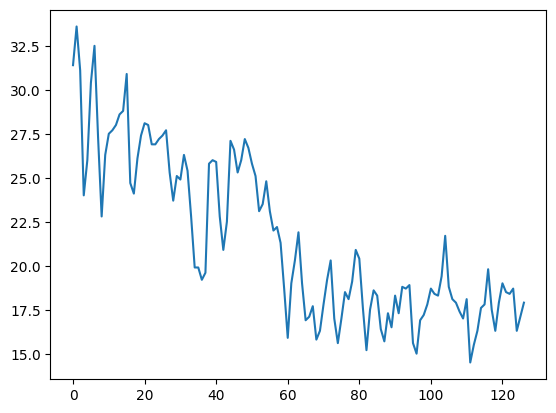

In [42]:
data["day.maxtemp_c"].plot()

In [43]:
data.columns

Index(['date', 'date_epoch', 'hour', 'day.maxtemp_c', 'day.maxtemp_f',
       'day.mintemp_c', 'day.mintemp_f', 'day.avgtemp_c', 'day.avgtemp_f',
       'day.maxwind_mph', 'day.maxwind_kph', 'day.totalprecip_mm',
       'day.totalprecip_in', 'day.totalsnow_cm', 'day.avgvis_km',
       'day.avgvis_miles', 'day.avghumidity', 'day.daily_will_it_rain',
       'day.daily_chance_of_rain', 'day.daily_will_it_snow',
       'day.daily_chance_of_snow', 'day.condition.text', 'day.condition.icon',
       'day.condition.code', 'day.uv', 'astro.sunrise', 'astro.sunset',
       'astro.moonrise', 'astro.moonset', 'astro.moon_phase',
       'astro.moon_illumination'],
      dtype='object')

<Axes: >

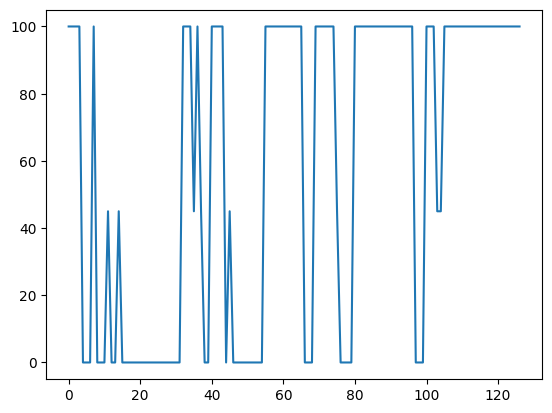

In [46]:
data["day.daily_chance_of_rain"].plot()

<Axes: >

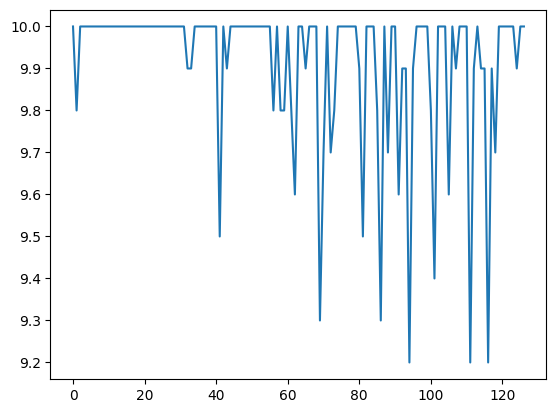

In [47]:
data["day.avgvis_km"].plot()

## Lets see if we can predict rain based on a window of temp/humidity data preceding a rain event

In [50]:
data.to_csv("mydata.csv")